# Data Cleaning/Explore

In [2]:
import pandas as pd
df = pd.read_csv('encuesta-anual-hogares-2019.csv', sep = ',')
print(df.shape)
df.columns

(14319, 31)


Index(['id', 'nhogar', 'miembro', 'comuna', 'dominio', 'edad', 'sexo',
       'parentesco_jefe', 'situacion_conyugal', 'num_miembro_padre',
       'num_miembro_madre', 'estado_ocupacional', 'cat_ocupacional',
       'calidad_ingresos_lab', 'ingreso_total_lab', 'calidad_ingresos_no_lab',
       'ingreso_total_no_lab', 'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'afiliacion_salud', 'hijos_nacidos_vivos',
       'cantidad_hijos_nac_vivos'],
      dtype='object')

In [3]:
from funpymodeling import status, freq_tbl, profiling_num
status (df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,5795,int64
1,nhogar,0,0.000000,0,0.000000,7,int64
2,miembro,0,0.000000,0,0.000000,19,int64
3,comuna,0,0.000000,0,0.000000,15,int64
4,dominio,0,0.000000,0,0.000000,2,object
5,edad,0,0.000000,128,0.008939,101,int64
6,sexo,0,0.000000,0,0.000000,2,object
7,parentesco_jefe,0,0.000000,0,0.000000,9,object
8,situacion_conyugal,1,0.000070,0,0.000000,7,object
9,num_miembro_padre,0,0.000000,0,0.000000,9,object


## Let's do this, column by column

In [4]:
data1 = df.copy()

### Id

<Axes: >

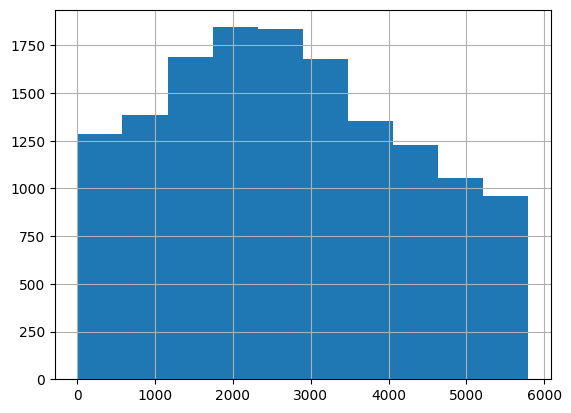

In [6]:
data1['id'].hist()

In [7]:
#ok I see, the ID is the HOME, and the row is the people
#Encuesta permanente de hogares is just that, home consult
data1.head()

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


#### I will try to transforms the other columns to make one row for each ID

### nhogar

In [8]:
data1['nhogar'].unique()

array([1, 2, 3, 4, 5, 6, 7])

<Axes: >

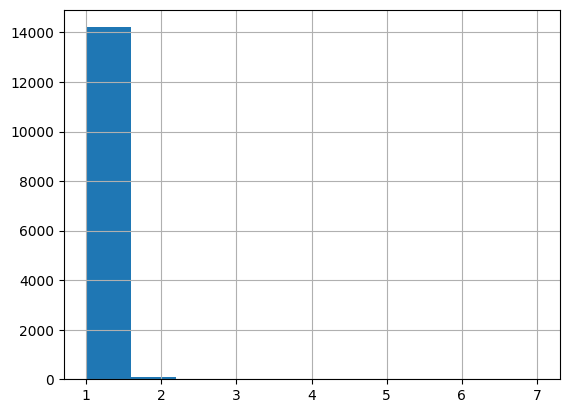

In [9]:
#NOT USEFULL
data1['nhogar'].hist()

In [14]:
data2 = data1.drop('nhogar', axis=1)
data2.columns

Index(['id', 'miembro', 'comuna', 'dominio', 'edad', 'sexo', 'parentesco_jefe',
       'situacion_conyugal', 'num_miembro_padre', 'num_miembro_madre',
       'estado_ocupacional', 'cat_ocupacional', 'calidad_ingresos_lab',
       'ingreso_total_lab', 'calidad_ingresos_no_lab', 'ingreso_total_no_lab',
       'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'afiliacion_salud', 'hijos_nacidos_vivos',
       'cantidad_hijos_nac_vivos'],
      dtype='object')

### miembro

In [15]:
data2['miembro'].dtype

dtype('int64')

<Axes: >

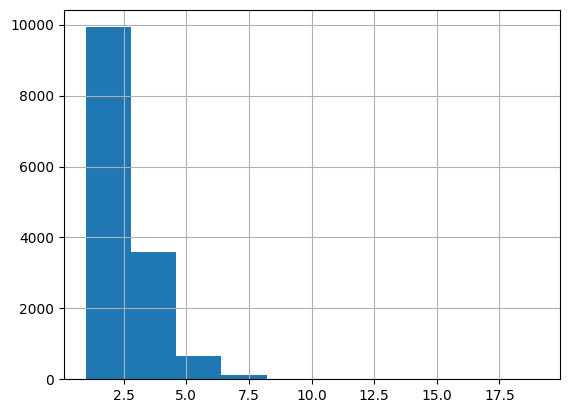

In [16]:
data2['miembro'].hist()

In [18]:
data2['miembro'].value_counts()

miembro
1     5848
2     4078
3     2301
4     1287
5      479
6      183
7       75
8       37
9       13
10       6
11       4
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
Name: count, dtype: int64

#### People living in the same home are clasified by a number, your are 1, you are 2 etc
#### So, I want to predict the income of that home. 
#### For that I will transform nhogar inhow much people lives there. n_members

In [57]:
data3=data2.copy()
data3['Cantidad de convivientes'] = data3.groupby('id')['miembro'].transform('max')
data3['Cantidad de convivientes'].value_counts()

Cantidad de convivientes
2     3555
4     3245
3     3041
1     1747
5     1482
6      652
7      270
8      192
9       63
11      33
10      20
19      19
Name: count, dtype: int64

In [58]:
data3.head()

,id,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,...,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos,Cantidad de convivientes
0,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,...,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde,2
1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,...,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde,2
2,2,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,2,...,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde,3
3,2,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,No corresponde,...,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2,3
4,2,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,2,...,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde,3


In [59]:
data4=data3.drop('miembro', axis=1)
data4.columns

Index(['id', 'comuna', 'dominio', 'edad', 'sexo', 'parentesco_jefe',
       'situacion_conyugal', 'num_miembro_padre', 'num_miembro_madre',
       'estado_ocupacional', 'cat_ocupacional', 'calidad_ingresos_lab',
       'ingreso_total_lab', 'calidad_ingresos_no_lab', 'ingreso_total_no_lab',
       'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'afiliacion_salud', 'hijos_nacidos_vivos',
       'cantidad_hijos_nac_vivos', 'Cantidad de convivientes'],
      dtype='object')

### comuna

In [60]:
data4['comuna'].dtype

dtype('int64')

<Axes: >

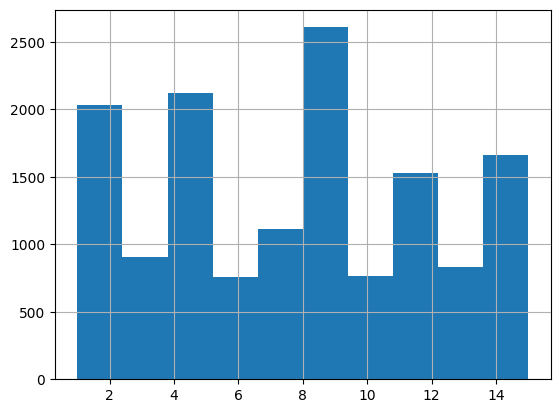

In [61]:
data4['comuna'].hist()

In [62]:
data4['comuna'].value_counts()

comuna
8     1640
4     1300
1     1265
7     1116
9      967
3      906
14     847
13     833
5      818
15     813
12     801
2      765
10     765
6      755
11     728
Name: count, dtype: int64

In [63]:
data41 = data4[['id', 'comuna']]
data41.columns

Index(['id', 'comuna'], dtype='object')

In [64]:
# I just want to check, one comuna per id
data41.head(20)

,id,comuna
0,1,5
1,1,5
2,2,2
3,2,2
4,2,2
5,3,10
6,3,10
7,3,10
8,4,15
9,4,15


In [65]:
status(data4)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,5795,int64
1,comuna,0,0.000000,0,0.000000,15,int64
2,dominio,0,0.000000,0,0.000000,2,object
3,edad,0,0.000000,128,0.008939,101,int64
4,sexo,0,0.000000,0,0.000000,2,object
5,parentesco_jefe,0,0.000000,0,0.000000,9,object
6,situacion_conyugal,1,0.000070,0,0.000000,7,object
7,num_miembro_padre,0,0.000000,0,0.000000,9,object
8,num_miembro_madre,0,0.000000,0,0.000000,11,object
9,estado_ocupacional,0,0.000000,0,0.000000,3,object


#### dominio

In [66]:
data4['dominio'].unique()

array(['Resto de la Ciudad', 'Villas de emergencia'], dtype=object)

In [67]:
# Villa de emergencia in degrading, so we can change for 'Barrio o Villa'
# And people who dont live at the metropolitan city say they live in a Barrio so, 'Barrio o Ciudad'
# Everyone consider they are in the middle of the population, or in the middle of the world

In [68]:
data5 = data4.copy()
data5['Barrio'] = data4['dominio'].replace({
    'Resto de la Ciudad': 'Barrio o Ciudad', 
    'Villas de emergencia': 'Barrio o Villa'
})
data6=data5.drop('dominio', axis=1)
status(data6)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,5795,int64
1,comuna,0,0.000000,0,0.000000,15,int64
2,edad,0,0.000000,128,0.008939,101,int64
3,sexo,0,0.000000,0,0.000000,2,object
4,parentesco_jefe,0,0.000000,0,0.000000,9,object
5,situacion_conyugal,1,0.000070,0,0.000000,7,object
6,num_miembro_padre,0,0.000000,0,0.000000,9,object
7,num_miembro_madre,0,0.000000,0,0.000000,11,object
8,estado_ocupacional,0,0.000000,0,0.000000,3,object
9,cat_ocupacional,0,0.000000,0,0.000000,5,object


#### edad

In [69]:
data6.edad.value_counts()

edad
37     235
23     231
32     223
42     222
31     221
      ... 
95       7
98       4
99       3
96       1
100      1
Name: count, Length: 101, dtype: int64

<Axes: >

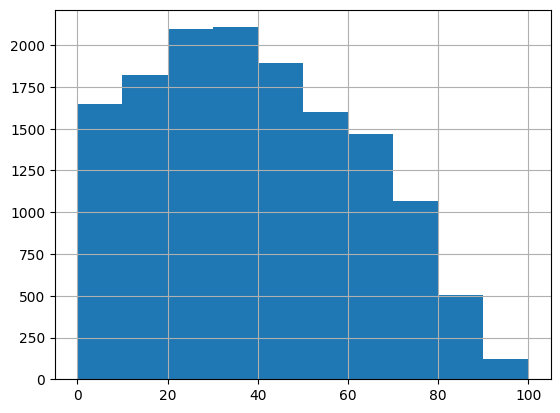

In [70]:
data6.edad.hist()

In [ ]:
# Hard decision, if I want to keep one id for one home, the home has no age
# The oldest does no represent the income, the main it hard to be a data input

#### Ingreso (INCOME) I MUST EXPLORE YOU NOW!

In [75]:
data61 = data6[['edad', 'id','calidad_ingresos_lab',
       'ingreso_total_lab', 'calidad_ingresos_no_lab', 'ingreso_total_no_lab',
       'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar']]
data61.head(20)

,edad,id,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar
0,18,1,No tuvo ingresos,0,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,18000,9000
1,18,1,No tuvo ingresos,0,Tuvo ingresos y declara monto,12000,Tuvo ingresos y declara monto,12000,Tuvo ingresos y declara monto,18000,9000
2,18,2,No tuvo ingresos,0,No tuvo ingresos,0,No tuvo ingresos,0,Tuvo ingresos pero no declara monto,100000,33333
3,50,2,Tuvo ingresos y declara monto,70000,Tuvo ingresos pero no declara monto,30000,Tuvo ingresos pero no declara monto,100000,Tuvo ingresos pero no declara monto,100000,33333
4,17,2,No tuvo ingresos,0,No tuvo ingresos,0,No tuvo ingresos,0,Tuvo ingresos pero no declara monto,100000,33333
5,18,3,No tuvo ingresos,0,Tuvo ingresos y declara monto,2500,Tuvo ingresos y declara monto,2500,Tuvo ingresos y declara monto,46500,15500
6,21,3,Tuvo ingresos y declara monto,44000,No tuvo ingresos,0,Tuvo ingresos y declara monto,44000,Tuvo ingresos y declara monto,46500,15500
7,1,3,No corresponde,0,No corresponde,0,No corresponde,0,Tuvo ingresos y declara monto,46500,15500
8,19,4,No tuvo ingresos,0,Tuvo ingresos y declara monto,5500,Tuvo ingresos y declara monto,5500,Tuvo ingresos y declara monto,11000,5500
9,15,4,No tuvo ingresos,0,Tuvo ingresos y declara monto,5500,Tuvo ingresos y declara monto,5500,Tuvo ingresos y declara monto,11000,5500


In [76]:
data61 = data6[['edad', 'id',
       'ingreso_total_lab', 'ingreso_total_no_lab',
       'ingresos_totales',
       'ingresos_familiares',
       'ingreso_per_capita_familiar']]
data61.head(20)

,edad,id,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ingreso_per_capita_familiar
0,18,1,0,6000,6000,18000,9000
1,18,1,0,12000,12000,18000,9000
2,18,2,0,0,0,100000,33333
3,50,2,70000,30000,100000,100000,33333
4,17,2,0,0,0,100000,33333
5,18,3,0,2500,2500,46500,15500
6,21,3,44000,0,44000,46500,15500
7,1,3,0,0,0,46500,15500
8,19,4,0,5500,5500,11000,5500
9,15,4,0,5500,5500,11000,5500


#### Now I understand better, I was working with this column ingresos_familiares
#### But i should work whit this column ingreso_total_lab
#### Thats why I want to predict the income of the home, and not of the people
#### While I was making that mistake, all my previus work is still usefull
#### Next time I just start exploring my target column!
#### I will work with people who work, to know their income

In [79]:
# Just make the crime, KILL THEM ALL (keep with life 'ingreso_total_lab')
data7 = data6.drop(['calidad_ingresos_lab',
       'calidad_ingresos_no_lab', 'ingreso_total_no_lab',
       'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar'], axis=1)
data7.columns

Index(['id', 'comuna', 'edad', 'sexo', 'parentesco_jefe', 'situacion_conyugal',
       'num_miembro_padre', 'num_miembro_madre', 'estado_ocupacional',
       'cat_ocupacional', 'ingreso_total_lab', 'estado_educativo',
       'sector_educativo', 'nivel_actual', 'nivel_max_educativo',
       'años_escolaridad', 'lugar_nacimiento', 'afiliacion_salud',
       'hijos_nacidos_vivos', 'cantidad_hijos_nac_vivos',
       'Cantidad de convivientes', 'Barrio'],
      dtype='object')

In [80]:
data7['ingreso_total_lab'].value_counts()

ingreso_total_lab
0        6963
30000     504
20000     396
40000     378
50000     323
         ... 
45050       1
45500       1
10200       1
58600       1
20500       1
Name: count, Length: 440, dtype: int64

In [81]:
# Let's kill some survivers
data8 = data7[data7['ingreso_total_lab'] != 0]
data8.head()

,id,comuna,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,...,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos,Cantidad de convivientes,Barrio
3,2,2,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,No corresponde,Ocupado,Asalariado,...,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2,3,Barrio o Ciudad
6,3,10,21,Varon,Conyugue o pareja,Unido/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,...,No corresponde,No corresponde,Primario especial,12,CABA,Solo obra social,NaN,No corresponde,3,Barrio o Ciudad
10,5,8,19,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,...,Estatal/publico,Terciario/superior no universitario,Otras escuelas especiales,13,Otra provincia,Solo obra social,No,No corresponde,1,Barrio o Ciudad
11,5,8,23,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,...,Estatal/publico,Terciario/superior no universitario,Otras escuelas especiales,13,Otra provincia,Solo obra social,No,No corresponde,1,Barrio o Ciudad
24,14,6,19,Varon,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,...,No corresponde,No corresponde,EGB (1° a 9° año),11,Partido GBA,Solo obra social,NaN,No corresponde,1,Barrio o Ciudad


In [82]:
data8.shape

(7356, 22)

In [83]:
status(data8)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.0,4612,int64
1,comuna,0,0.000000,0,0.0,15,int64
2,edad,0,0.000000,0,0.0,75,int64
3,sexo,0,0.000000,0,0.0,2,object
4,parentesco_jefe,0,0.000000,0,0.0,9,object
5,situacion_conyugal,0,0.000000,0,0.0,7,object
6,num_miembro_padre,0,0.000000,0,0.0,7,object
7,num_miembro_madre,0,0.000000,0,0.0,7,object
8,estado_ocupacional,0,0.000000,0,0.0,3,object
9,cat_ocupacional,0,0.000000,0,0.0,5,object


#### edad (again)

In [88]:
data8.edad.sort_values().unique()

array([12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
       81, 82, 83, 84, 85, 86, 91])

<Axes: >

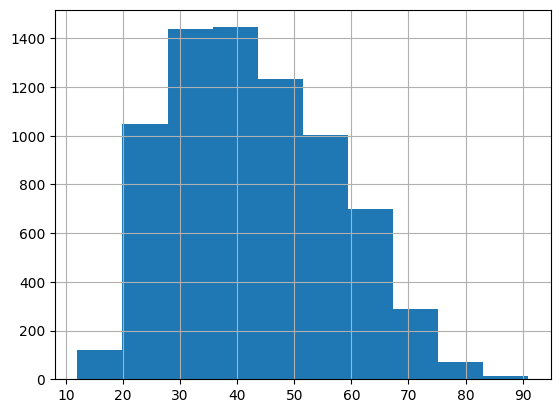

In [86]:
data8.edad.hist()

#### The 12-year-old child and the nonagenarian move me, I will not delete the outliers, I will just wipe my tears."

#### sexo

In [89]:
data8.sexo.value_counts()

sexo
Varon    3772
Mujer    3584
Name: count, dtype: int64

#### parentesco jefe

In [92]:
data8['parentesco_jefe'].value_counts()

parentesco_jefe
Jefe                                   4108
Conyugue o pareja                      1829
Hijo/a - Hijastro/a                    1012
Otro familiar                           181
Otro no familiar                         88
Yerno/nuera                              41
Padre/Madre/Suegro/a                     39
Servicio domestico y sus familiares      34
Nieto/a                                  24
Name: count, dtype: int64

In [93]:
# Make more confortable and enjoy the data input
data9 = data8.rename(columns={'parentesco_jefe': 'Paterfamilias'})

#### situacion conyugal

In [94]:
data9['situacion_conyugal'].value_counts()

situacion_conyugal
Casado/a                            2206
Unido/a                             1995
Soltero/a                           1787
Separado/a de unión o matrimonio     845
Divorciado/a                         355
Viudo/a                              167
No corresponde                         1
Name: count, dtype: int64

In [95]:
data10 = data9[data9['situacion_conyugal'] != 'No corresponde']
data10['situacion_conyugal'].value_counts()

situacion_conyugal
Casado/a                            2206
Unido/a                             1995
Soltero/a                           1787
Separado/a de unión o matrimonio     845
Divorciado/a                         355
Viudo/a                              167
Name: count, dtype: int64

In [96]:
print(data9.shape)
print(data10.shape)

(7356, 22)
(7355, 22)


#### num_miembro_padre

In [97]:
data10.num_miembro_padre.value_counts()

num_miembro_padre
No corresponde               6668
Padre no vive en el hogar     451
1                             171
2                              58
3                               5
5                               1
6                               1
Name: count, dtype: int64

#### num_miembro_madre

In [98]:
data10.num_miembro_madre.value_counts()

num_miembro_madre
No corresponde               6668
Madre no vive en el hogar     266
1                             242
2                             162
3                              11
4                               5
5                               1
Name: count, dtype: int64

#### estado_ocupacional

In [101]:
#how if he is inactive has job_income
data10.estado_ocupacional.value_counts()


estado_ocupacional
Ocupado       7186
Desocupado     101
Inactivo        68
Name: count, dtype: int64

In [105]:
data101 = data10[data10['estado_ocupacional'] == 'Inactivo']
data101['ingreso_total_lab'].head(10)

54       1000
58        400
73      23000
80      19000
94        600
150      4000
222       300
775      6000
836     45000
1134     8000
Name: ingreso_total_lab, dtype: int64

In [107]:
data102 = data10[data10['estado_ocupacional'] == 'Desocupado']
data102['ingreso_total_lab'].head(10)

155     3000
230    12000
278     3000
366    12000
506     3000
531    30000
624    22000
646    10000
888     7000
960     6000
Name: ingreso_total_lab, dtype: int64

##### ingreso_total_lab is income for working!! I they are not working its imposible!
##### maybe their job is not no make to much questions...

#### cat_ocupacional

In [108]:
data10.cat_ocupacional.value_counts()


cat_ocupacional
Asalariado                      5415
Trabajador por cuenta propia    1462
Patron/empleador                 307
No corresponde                   169
Trabajador familiar                2
Name: count, dtype: int64

#### Just kill them

In [109]:
data10.columns

Index(['id', 'comuna', 'edad', 'sexo', 'Paterfamilias', 'situacion_conyugal',
       'num_miembro_padre', 'num_miembro_madre', 'estado_ocupacional',
       'cat_ocupacional', 'ingreso_total_lab', 'estado_educativo',
       'sector_educativo', 'nivel_actual', 'nivel_max_educativo',
       'años_escolaridad', 'lugar_nacimiento', 'afiliacion_salud',
       'hijos_nacidos_vivos', 'cantidad_hijos_nac_vivos',
       'Cantidad de convivientes', 'Barrio'],
      dtype='object')

In [113]:
data11 = data10.drop(['num_miembro_padre', 'num_miembro_madre', 'estado_ocupacional',
       'cat_ocupacional'], axis=1)
data11.columns

Index(['id', 'comuna', 'edad', 'sexo', 'Paterfamilias', 'situacion_conyugal',
       'ingreso_total_lab', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'afiliacion_salud', 'hijos_nacidos_vivos',
       'cantidad_hijos_nac_vivos', 'Cantidad de convivientes', 'Barrio'],
      dtype='object')

### EDUCATION

In [114]:
display(data11.estado_educativo.value_counts())
display(data11.sector_educativo.value_counts())
display(data11.nivel_actual.value_counts())
display(data11.nivel_max_educativo.value_counts())
display(data11.años_escolaridad.value_counts())

estado_educativo
No asiste pero asistió    6308
Asiste                    1036
Nunca asistio               11
Name: count, dtype: int64

sector_educativo
No corresponde          6319
Estatal/publico          695
Privado no religioso     271
Privado religioso         70
Name: count, dtype: int64

nivel_actual
No corresponde                         6319
Universitario                           589
Terciario/superior no universitario     180
Postgrado                               173
Secundario/medio adultos                 55
Secundario/medio comun                   32
Primario adultos                          7
Name: count, dtype: int64

nivel_max_educativo
Secundario/medio comun       2897
Otras escuelas especiales    1665
Primario especial            1334
EGB (1° a 9° año)             886
Primario comun                428
Sala de 5                     128
No corresponde                  4
Name: count, dtype: int64

años_escolaridad
12                                    1683
17                                    1481
15                                    1056
14                                     505
19                                     483
7                                      482
13                                     300
9                                      264
10                                     244
16                                     234
11                                     202
18                                     153
8                                      120
3                                       32
5                                       29
2                                       21
6                                       19
4                                       17
Ningun año de escolaridad aprobado      14
1                                        7
Name: count, dtype: int64

In [117]:
# I will keep with nivel_max_educativo. 
# But is a problem. Nobody complete superior studies
# But Postgrado 173... ok
display(data11.nivel_max_educativo.value_counts())

nivel_max_educativo
Secundario/medio comun       2897
Otras escuelas especiales    1665
Primario especial            1334
EGB (1° a 9° año)             886
Primario comun                428
Sala de 5                     128
No corresponde                  4
Name: count, dtype: int64

In [118]:
display(data1.nivel_max_educativo.value_counts())

nivel_max_educativo
Secundario/medio comun       3672
Otras escuelas especiales    2570
EGB (1° a 9° año)            2304
Primario especial            2194
Sala de 5                    1540
Primario comun                943
No corresponde                 42
Name: count, dtype: int64

In [119]:
display(data1.nivel_actual.value_counts())

nivel_actual
No corresponde                         9903
Primario comun                         1227
Universitario                          1042
Secundario/medio comun                  910
Terciario/superior no universitario     262
Postgrado                               180
Sala de 4                               173
Sala de 5                               162
Jardin maternal                         161
Sala de 3                               147
Secundario/medio adultos                105
Otras escuelas especiales                23
Primario especial                        15
Primario adultos                          9
Name: count, dtype: int64

#### I will keep the max level education, but is not usefull for a deploy
#### you need the university and postgraduate option in the input
#### and for that you need data
#### I am so sad
#### Just clean up to the end, someday this will be usefull !!

In [120]:
data12 = data11.drop(['estado_educativo', 'sector_educativo',
       'nivel_actual', 'años_escolaridad'], axis=1)
data12.columns

Index(['id', 'comuna', 'edad', 'sexo', 'Paterfamilias', 'situacion_conyugal',
       'ingreso_total_lab', 'nivel_max_educativo', 'lugar_nacimiento',
       'afiliacion_salud', 'hijos_nacidos_vivos', 'cantidad_hijos_nac_vivos',
       'Cantidad de convivientes', 'Barrio'],
      dtype='object')

In [121]:
data12.lugar_nacimiento.value_counts()

lugar_nacimiento
CABA                   3809
Otra provincia         1000
Partido GBA             774
Pais limitrofe          765
Pais no limitrofe       654
PBA excepto GBA         348
PBA sin especificar       5
Name: count, dtype: int64

In [131]:
data13 = data12[data12['lugar_nacimiento'] != 'PBA sin especificar']
data13['lugar_nacimiento'].value_counts()

lugar_nacimiento
CABA                 3809
Otra provincia       1000
Partido GBA           774
Pais limitrofe        765
Pais no limitrofe     654
PBA excepto GBA       348
Name: count, dtype: int64

In [123]:
print(data12.shape)
print(data13.shape)

(7355, 14)
(7350, 14)


In [125]:
data13.afiliacion_salud.value_counts()

afiliacion_salud
Solo obra social                                             3609
Solo prepaga o mutual via OS                                 1356
Solo sistema publico                                         1320
Solo plan de medicina prepaga por contratación voluntaria     670
Otros                                                         392
Name: count, dtype: int64

In [126]:
data14 = data13.drop(['hijos_nacidos_vivos', 'cantidad_hijos_nac_vivos'], axis=1)
status(data14)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.0,4610,int64
1,comuna,0,0.000000,0,0.0,15,int64
2,edad,0,0.000000,0,0.0,74,int64
3,sexo,0,0.000000,0,0.0,2,object
4,Paterfamilias,0,0.000000,0,0.0,9,object
5,situacion_conyugal,0,0.000000,0,0.0,6,object
6,ingreso_total_lab,0,0.000000,0,0.0,439,int64
7,nivel_max_educativo,13,0.001769,0,0.0,7,object
8,lugar_nacimiento,0,0.000000,0,0.0,6,object
9,afiliacion_salud,3,0.000408,0,0.0,5,object


<Axes: >

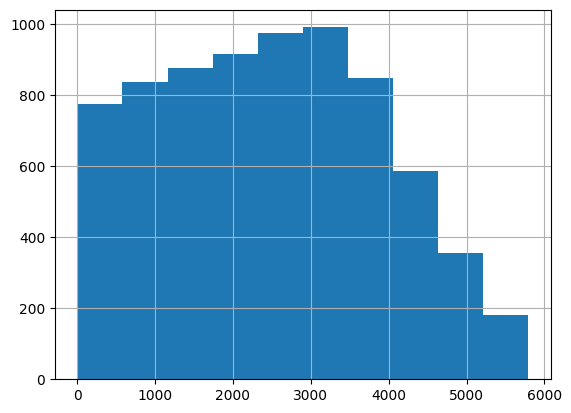

In [127]:
data14.id.hist()

In [128]:
data14.shape

(7350, 12)

In [129]:
# ID is not usefull anymore
data15 = data14.drop('id', axis=1)

array([[<Axes: title={'center': 'comuna'}>,
        <Axes: title={'center': 'edad'}>],
       [<Axes: title={'center': 'ingreso_total_lab'}>,
        <Axes: title={'center': 'Cantidad de convivientes'}>]],
      dtype=object)

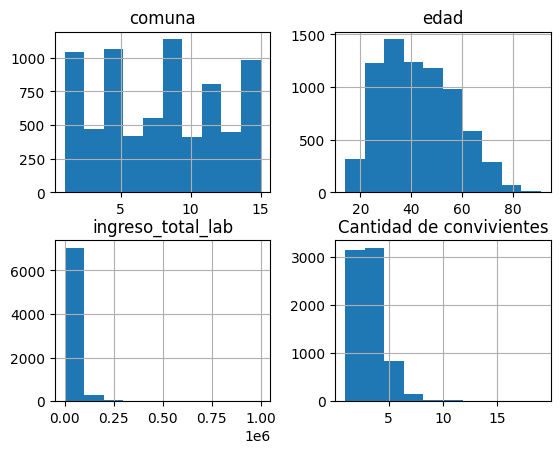

In [130]:
data15.hist()

<Axes: >

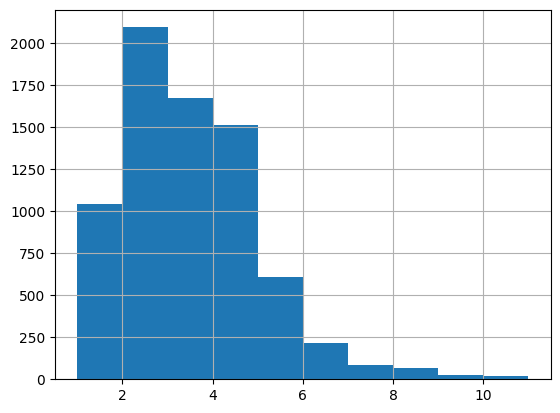

In [133]:
data16 = data15[data15['Cantidad de convivientes'] <= 15]
data16['Cantidad de convivientes'].hist()

In [137]:
data16.ingreso_total_lab.sort_values().unique()

array([    100,     200,     250,     300,     350,     400,     450,
           500,     600,     700,     800,     900,    1000,    1200,
          1300,    1350,    1500,    1600,    1700,    1750,    1800,
          1900,    2000,    2100,    2160,    2200,    2240,    2300,
          2400,    2500,    2600,    2700,    2742,    2800,    3000,
          3120,    3200,    3300,    3400,    3500,    3600,    3640,
          3800,    4000,    4160,    4300,    4500,    4560,    4800,
          5000,    5100,    5200,    5300,    5400,    5440,    5500,
          5600,    5700,    5800,    5850,    6000,    6100,    6140,
          6200,    6240,    6500,    6530,    6600,    6800,    7000,
          7100,    7200,    7500,    7600,    7700,    7800,    8000,
          8052,    8100,    8200,    8500,    8600,    8900,    9000,
          9200,    9500,    9600,    9700,    9750,    9800,    9946,
         10000,   10080,   10200,   10300,   10400,   10500,   10560,
         10800,   11

<Axes: >

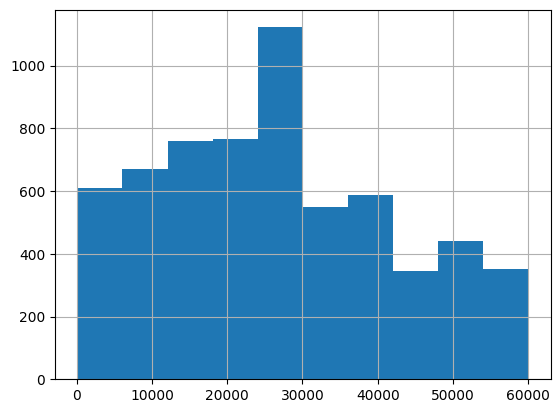

In [138]:
data17 = data15[data15['ingreso_total_lab'] <= 60000]
data17['ingreso_total_lab'].hist()

In [139]:
status(data17)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,comuna,0,0.000000,0,0.0,15,int64
1,edad,0,0.000000,0,0.0,74,int64
2,sexo,0,0.000000,0,0.0,2,object
3,Paterfamilias,0,0.000000,0,0.0,9,object
4,situacion_conyugal,0,0.000000,0,0.0,6,object
5,ingreso_total_lab,0,0.000000,0,0.0,303,int64
6,nivel_max_educativo,13,0.002097,0,0.0,7,object
7,lugar_nacimiento,0,0.000000,0,0.0,6,object
8,afiliacion_salud,3,0.000484,0,0.0,5,object
9,Cantidad de convivientes,0,0.000000,0,0.0,12,int64


In [140]:
data17.shape

(6198, 11)